In [8]:
import numpy as np
import pandas as pd
#from os import path
#from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# ml library
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load Library
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('../data/bios2021-abstract-text.txt', sep=';')
df.head()

,name,title,abstract,keywords,category,lang
0,Kougami Arising,Sibyl EEG: Diagnosis Aktivitas Otak pada Subje...,COVID-19 menyebabkan kesehatan mental menjadi ...,NaN,Diagnostik,Indonesia
1,Destination,NaN,COVID-19 merupakan penyakit yang disebabkan ol...,"Kaempferol, Alpinia galanga, immunosuppressive...",Obat-obatan/ Terapi kesehatan,Indonesia
2,Biogenesis,Desain Vaksin Peptida Salmonella enterica sero...,Salmonella enterica serovar Typhi (S. Typhi) m...,"S. Typhi, tifoid, OMP, vaksin, epitop",Diagnostik,Indonesia
3,FK Unjani,Sequencing and Bioinformatics Analysis of ~ 20...,"Antiretroviral (ARV) combination treatment, wi...",NaN,Obat-obatan/ Terapi kesehatan,English
4,PANACEA,NaN,"Currently, the world is hit by a pandemic caus...","Machine Learning, Multiple targets, Resistance...",Obat-obatan/ Terapi kesehatan,English


In [10]:
df.to_csv('../data/abstract.csv')

In [4]:
print("There are {} observations and {} features in this dataset.".format(df.shape[0],df.shape[1]))
print("There are {} types of categories in this dataset: {}".format(len(df.category.unique()),
                                                                           ", ".join(df.category.unique())))
print("There are {} Indonesian and {} English abstract".format(df.lang.value_counts()['Indonesia'], 
                                                               df.lang.value_counts()['English']))

There are 34 observations and 6 features in this dataset.
There are 5 types of categories in this dataset: Diagnostik, Obat-obatan/ Terapi kesehatan, Lingkungan, Energi, Pangan & Nutrisi
There are 23 Indonesian and 11 English abstract


In [5]:
def bioswordcloud(text, show=True):
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    #set the stopwords list
    stopwords= set(STOPWORDS)

    #append new words to the stopwords list
    with open("../data/filter-indo.txt", "r") as f:
        new_words = f.read().splitlines()
        f.close()
    new_stopwords=stopwords.union(new_words)

    #generate the word cloud with parameters
    wc = WordCloud(background_color="white", 
                   stopwords=new_stopwords,
                   normalize_plurals= True)
    wc.generate(text)
    if show == True:
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()
    else:
        pass
    return wc

In [6]:
counts = []
for num, text in enumerate(df.abstract):
    #print(df.name[num])
    wc = bioswordcloud(text, show=False)
    counts.append(wc.words_)

In [6]:
df_count = pd.DataFrame()
for num, i in enumerate(counts):
    #print(num, i)
    df1 = pd.DataFrame.from_dict(i, orient='index', columns=[df.name[num]])
    df_count = pd.concat([df_count, df1], axis=1)
df_count = df_count.fillna(0).transpose()
df_count

,otak,mental,sel,gelombang,Pola,kesehatan,neuron,mekanisme,kerja,EEG,...,phosphorylation,argonaute,genes,respectively,upregulated,event,utilized,applied,counteracting,downregulated
Kougami Arising,1.0,0.8,0.800000,0.8,0.6,0.400,0.400000,0.400000,0.4,0.4,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Destination,0.0,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Biogenesis,0.0,0.0,0.333333,0.0,0.0,0.000,0.000000,0.000000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
FK Unjani,0.0,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Panacea,0.0,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
GSEP4R,0.0,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Relic Team,0.2,0.0,0.000000,0.0,0.0,0.200,0.000000,0.000000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Panzerkampfwagen V,0.0,0.0,0.250000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
i3LCV,0.0,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
PORE,0.0,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [7]:
X = df_count.values

In [8]:
scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = df_count.columns)

X_scaled.sample(5)

,otak,mental,sel,gelombang,Pola,kesehatan,neuron,mekanisme,kerja,EEG,...,phosphorylation,argonaute,genes,respectively,upregulated,event,utilized,applied,counteracting,downregulated
14,-0.206041,-0.174078,-0.457041,-0.174078,-0.174078,-0.27791,-0.230129,-0.216012,-0.174078,-0.174078,...,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078
22,-0.206041,-0.174078,-0.457041,-0.174078,-0.174078,-0.27791,2.071164,-0.216012,-0.174078,-0.174078,...,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078
1,-0.206041,-0.174078,-0.457041,-0.174078,-0.174078,-0.27791,-0.230129,-0.216012,-0.174078,-0.174078,...,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078
18,-0.206041,-0.174078,0.697589,-0.174078,-0.174078,-0.27791,-0.230129,-0.216012,-0.174078,-0.174078,...,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078
5,-0.206041,-0.174078,-0.457041,-0.174078,-0.174078,-0.27791,-0.230129,-0.216012,-0.174078,-0.174078,...,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078,-0.174078


In [9]:
seed = 0
ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
1,-2.245056,-1.043131
7,-1.480110,-0.073435
18,-2.922116,-3.426064
3,11.181187,31.844505
29,0.780420,3.725109


In [10]:


nclusters = 6 # this is the k in kmeans


km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_pca)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_pca)
y_cluster_kmeans



array([0, 0, 0, 3, 2, 2, 0, 0, 2, 5, 2, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 5,
       0, 0, 4, 0, 0, 1, 5, 2, 0, 2, 0, 2], dtype=int32)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

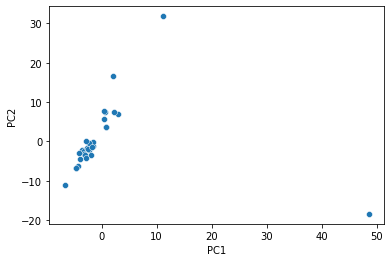

In [11]:
sns.scatterplot(data=X_pca, x="PC1", y="PC2")

In [12]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA)");

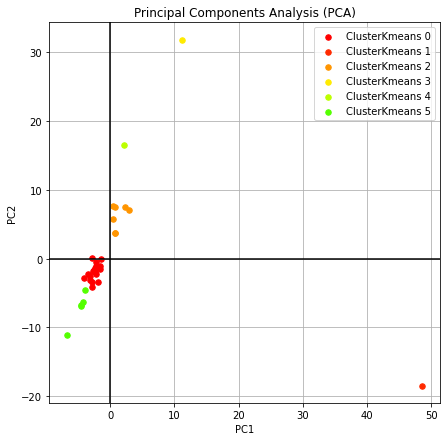

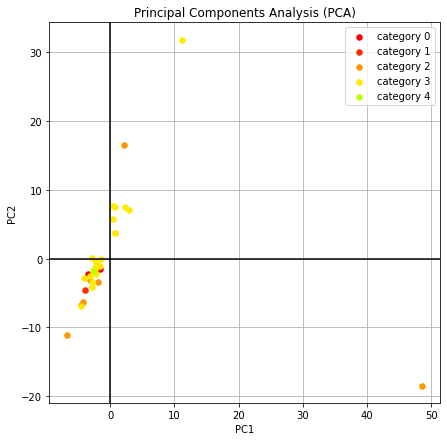

In [13]:
# plot the clusters each datapoint was assigned to
df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df.category = pd.Categorical(df.category)
df_plot['category'] = df.category.cat.codes
plotData(df_plot, 'ClusterKmeans')
plotData(df_plot, 'category')

In [14]:
df['group'] = y_cluster_kmeans

group 0 : Kougami Arising 


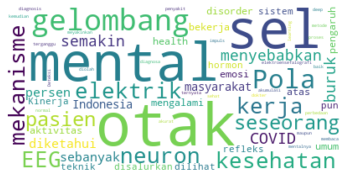

group 0 : Destination


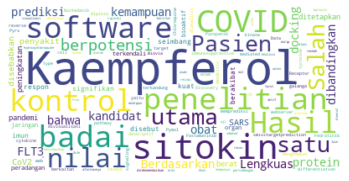

group 0 : Biogenesis


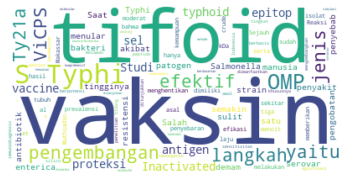

group 0 : Relic Team


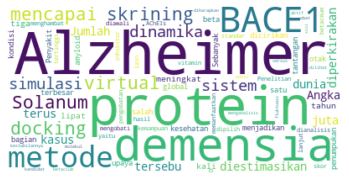

group 0 : Panzerkampfwagen V


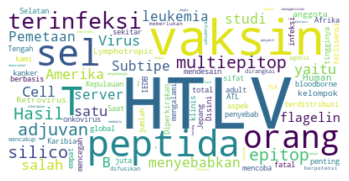

group 0 : Bioformits


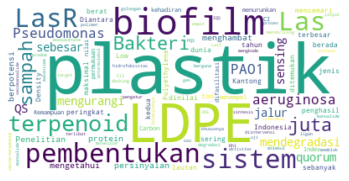

group 0 : EBerekayasa


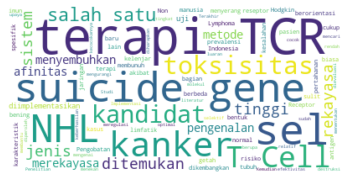

group 0 : WSF-Bilimbi


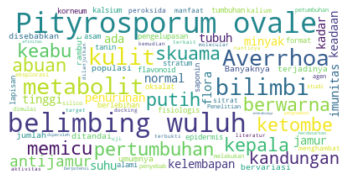

group 0 : BIOS TP UNIMUS


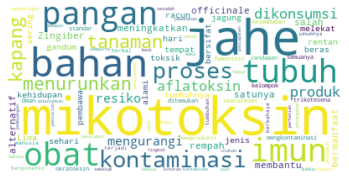

group 0 : Microdegradation Team


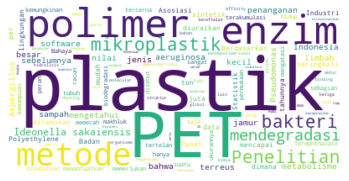

group 0 : Flavoquinol


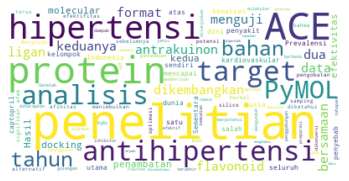

group 0 : FAKE TEAM DIPONEGORO


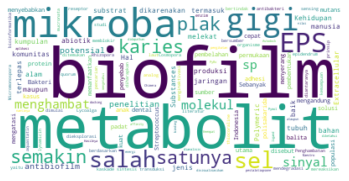

group 0 : DipoInfor


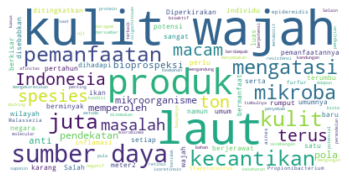

group 0 : Eunoia


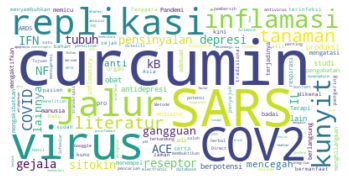

group 0 : Biomer_UPI


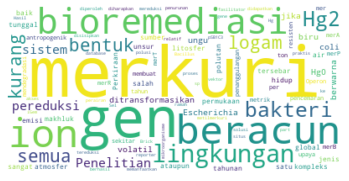

group 0 : BIKOKA


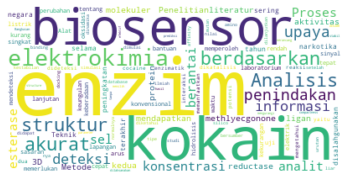

group 0 : RedNosZ-UPI


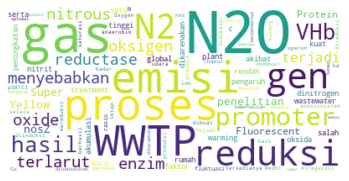

group 0 : Froncavi


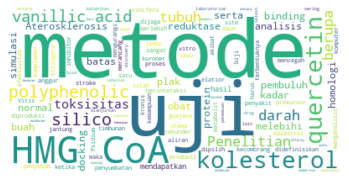

group 0 : CAMphage


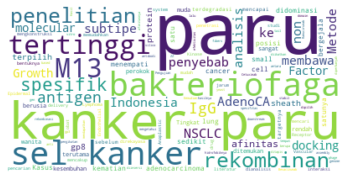

group 1 : ABM Squad


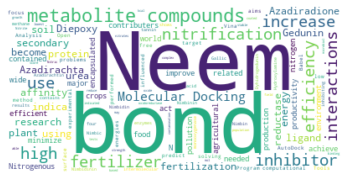

group 2 : Panacea


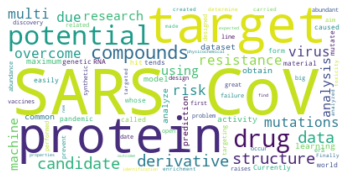

group 2 : GSEP4R


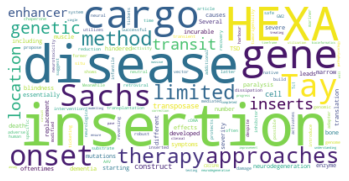

group 2 : i3LCV


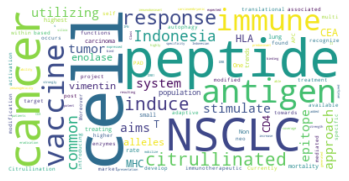

group 2 : Erythrological


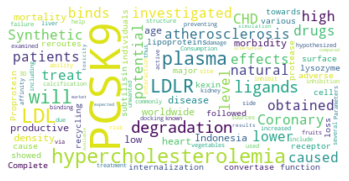

group 2 : MEVolution


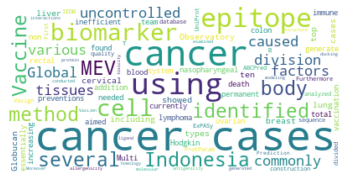

group 2 : GUNA


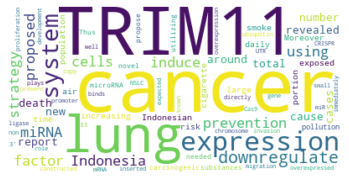

group 2 : UANG


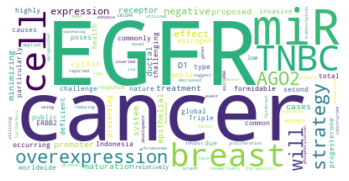

group 3 : FK Unjani


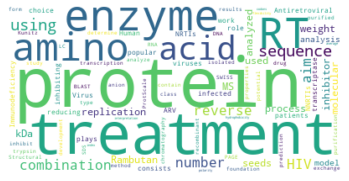

group 4 : BioZPro


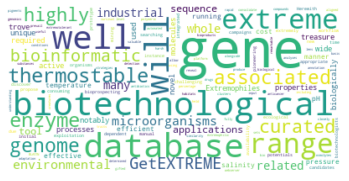

group 5 : PORE


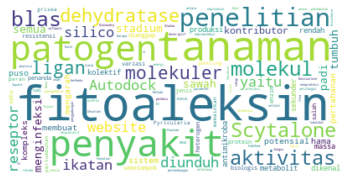

group 5 : Biolumvito-UPI


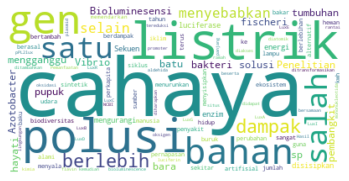

group 5 : DelacGene-UPI


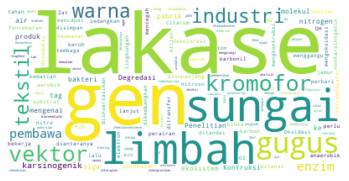

group 5 : Tricoli-UPI


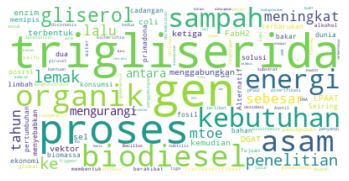

group 5 : Andri Mulyani


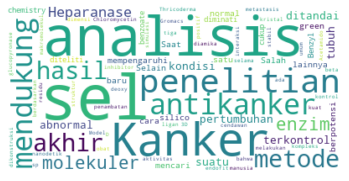

In [15]:
counts = []
for i in range(6):
    for num, text in enumerate(df.abstract):
        if df.group[num] == i:
            print('group', i, ':',  df.name[num])
            wc = bioswordcloud(df.abstract[num])
            counts.append(wc.words_)